<a href="https://colab.research.google.com/github/asamiei/mitoses_detection_/blob/main/Mitoses_counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Alireza Samiei, Jan 2022

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib
import glob
import ntpath
from PIL import Image
import cv2
import scipy
import skimage
from skimage.measure import label, regionprops, regionprops_table
from skimage import measure, color, io, data
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
from skimage import measure, io, img_as_ubyte
from skimage.color import label2rgb, rgb2gray, hed2rgb, rgb2hed
from skimage.segmentation import clear_border
from skimage import measure, io, img_as_ubyte
from tqdm import tqdm
!pip install opencv-python-headless==4.1.2.30

# need the updated version of scikit image 
!pip install scikit-image==0.18.3 


## Installing cellpose library
###https://www.biorxiv.org/content/10.1101/2020.02.02.931238v1

In [5]:
!pip install cellpose==0.6.5


import numpy as np
import time, os, sys, random
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
from urllib.parse import urlparse
import shutil

print ("Downloading Models")
from cellpose import models


#Check GPU access
if models.use_gpu()==False: 
  #Warnings from the ZeroCost StarDist notebook
  print('Did you change your runtime ?') 
  print('If the runtime setting is correct then Google did not allocate a GPU for your session')
  print('Expect slow performance. To access GPU try reconnecting later')
  use_GPU=False
else:

  print("*************************************************")
  !nvidia-smi
  use_GPU=True

print("*************************************************")
print("Libraries imported and configured")


     |████████████████████████████████| 13.3 MB 21.4 MB/s 
  Created wheel for cellpose: filename=cellpose-0.6.5-py3-none-any.whl size=152511 sha256=e2e017b0b38287ee872423614fb0a8003211ca7ababeb822841e194825fae8bd
  Stored in directory: /root/.cache/pip/wheels/0e/6a/fc/e28edbe6b2f78b3ee4c011e97236b996818d86bec88e78dc64
Successfully built cellpose
creating new log file
2022-04-30 01:27:45,113 [INFO] WRITING LOG OUTPUT TO /root/.cellpose/run.log
2022-04-30 01:27:45,138 [INFO] Downloading: "https://www.cellpose.org/models/cyto_0" to /root/.cellpose/models/cyto_0



100%|██████████| 25.2M/25.2M [00:03<00:00, 8.27MB/s]

2022-04-30 01:27:49,344 [INFO] Downloading: "https://www.cellpose.org/models/cyto_1" to /root/.cellpose/models/cyto_1




100%|██████████| 25.2M/25.2M [00:03<00:00, 8.13MB/s]

2022-04-30 01:27:53,471 [INFO] Downloading: "https://www.cellpose.org/models/cyto_2" to /root/.cellpose/models/cyto_2




100%|██████████| 25.2M/25.2M [00:03<00:00, 8.10MB/s]

2022-04-30 01:27:57,620 [INFO] Downloading: "https://www.cellpose.org/models/cyto_3" to /root/.cellpose/models/cyto_3




100%|██████████| 25.2M/25.2M [00:03<00:00, 8.10MB/s]

2022-04-30 01:28:01,768 [INFO] Downloading: "https://www.cellpose.org/models/size_cyto_0.npy" to /root/.cellpose/models/size_cyto_0.npy




100%|██████████| 3.55k/3.55k [00:00<00:00, 12.5MB/s]

2022-04-30 01:28:02,435 [INFO] Downloading: "https://www.cellpose.org/models/cytotorch_0" to /root/.cellpose/models/cytotorch_0




100%|██████████| 25.3M/25.3M [00:03<00:00, 8.30MB/s]

2022-04-30 01:28:06,497 [INFO] Downloading: "https://www.cellpose.org/models/cytotorch_1" to /root/.cellpose/models/cytotorch_1




100%|██████████| 25.3M/25.3M [00:03<00:00, 8.19MB/s]

2022-04-30 01:28:10,616 [INFO] Downloading: "https://www.cellpose.org/models/cytotorch_2" to /root/.cellpose/models/cytotorch_2




100%|██████████| 25.3M/25.3M [00:03<00:00, 8.28MB/s]

2022-04-30 01:28:14,686 [INFO] Downloading: "https://www.cellpose.org/models/cytotorch_3" to /root/.cellpose/models/cytotorch_3




100%|██████████| 25.3M/25.3M [00:03<00:00, 8.11MB/s]

2022-04-30 01:28:18,845 [INFO] Downloading: "https://www.cellpose.org/models/size_cytotorch_0.npy" to /root/.cellpose/models/size_cytotorch_0.npy




100%|██████████| 5.23k/5.23k [00:00<00:00, 7.24MB/s]

2022-04-30 01:28:19,552 [INFO] Downloading: "https://www.cellpose.org/models/cyto2torch_0" to /root/.cellpose/models/cyto2torch_0




100%|██████████| 25.3M/25.3M [00:03<00:00, 8.22MB/s]

2022-04-30 01:28:23,655 [INFO] Downloading: "https://www.cellpose.org/models/cyto2torch_1" to /root/.cellpose/models/cyto2torch_1




100%|██████████| 25.3M/25.3M [00:03<00:00, 8.18MB/s]

2022-04-30 01:28:27,779 [INFO] Downloading: "https://www.cellpose.org/models/cyto2torch_2" to /root/.cellpose/models/cyto2torch_2




100%|██████████| 25.3M/25.3M [00:03<00:00, 8.13MB/s]

2022-04-30 01:28:31,929 [INFO] Downloading: "https://www.cellpose.org/models/cyto2torch_3" to /root/.cellpose/models/cyto2torch_3




100%|██████████| 25.3M/25.3M [00:03<00:00, 8.80MB/s]

2022-04-30 01:28:35,815 [INFO] Downloading: "https://www.cellpose.org/models/size_cyto2torch_0.npy" to /root/.cellpose/models/size_cyto2torch_0.npy




100%|██████████| 3.54k/3.54k [00:00<00:00, 9.95MB/s]

2022-04-30 01:28:36,482 [INFO] Downloading: "https://www.cellpose.org/models/nuclei_0" to /root/.cellpose/models/nuclei_0




100%|██████████| 25.2M/25.2M [00:03<00:00, 8.26MB/s]

2022-04-30 01:28:40,550 [INFO] Downloading: "https://www.cellpose.org/models/nuclei_1" to /root/.cellpose/models/nuclei_1




100%|██████████| 25.2M/25.2M [00:03<00:00, 8.11MB/s]

2022-04-30 01:28:44,688 [INFO] Downloading: "https://www.cellpose.org/models/nuclei_2" to /root/.cellpose/models/nuclei_2




100%|██████████| 25.2M/25.2M [00:03<00:00, 8.02MB/s]

2022-04-30 01:28:48,874 [INFO] Downloading: "https://www.cellpose.org/models/nuclei_3" to /root/.cellpose/models/nuclei_3




100%|██████████| 25.2M/25.2M [00:03<00:00, 7.99MB/s]

2022-04-30 01:28:53,145 [INFO] Downloading: "https://www.cellpose.org/models/size_nuclei_0.npy" to /root/.cellpose/models/size_nuclei_0.npy




100%|██████████| 3.55k/3.55k [00:00<00:00, 8.58MB/s]

2022-04-30 01:28:53,807 [INFO] Downloading: "https://www.cellpose.org/models/nucleitorch_0" to /root/.cellpose/models/nucleitorch_0




100%|██████████| 25.3M/25.3M [00:03<00:00, 8.15MB/s]

2022-04-30 01:28:58,109 [INFO] Downloading: "https://www.cellpose.org/models/nucleitorch_1" to /root/.cellpose/models/nucleitorch_1




100%|██████████| 25.3M/25.3M [00:03<00:00, 8.08MB/s]

2022-04-30 01:29:02,278 [INFO] Downloading: "https://www.cellpose.org/models/nucleitorch_2" to /root/.cellpose/models/nucleitorch_2




100%|██████████| 25.3M/25.3M [00:03<00:00, 8.16MB/s]

2022-04-30 01:29:06,403 [INFO] Downloading: "https://www.cellpose.org/models/nucleitorch_3" to /root/.cellpose/models/nucleitorch_3




100%|██████████| 25.3M/25.3M [00:03<00:00, 8.05MB/s]

2022-04-30 01:29:10,587 [INFO] Downloading: "https://www.cellpose.org/models/size_nucleitorch_0.npy" to /root/.cellpose/models/size_nucleitorch_0.npy




100%|██████████| 3.54k/3.54k [00:00<00:00, 12.2MB/s]


2022-04-30 01:29:19,868 [INFO] ** TORCH CUDA version installed and working. **
*************************************************
Sat Apr 30 01:29:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    26W /  70W |   1250MiB / 15109MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+------

# **Input image here:**
### Software optimized for Olympus cellSens microscope mounted camera, 20X objective

size =  (1933, 3583, 3)


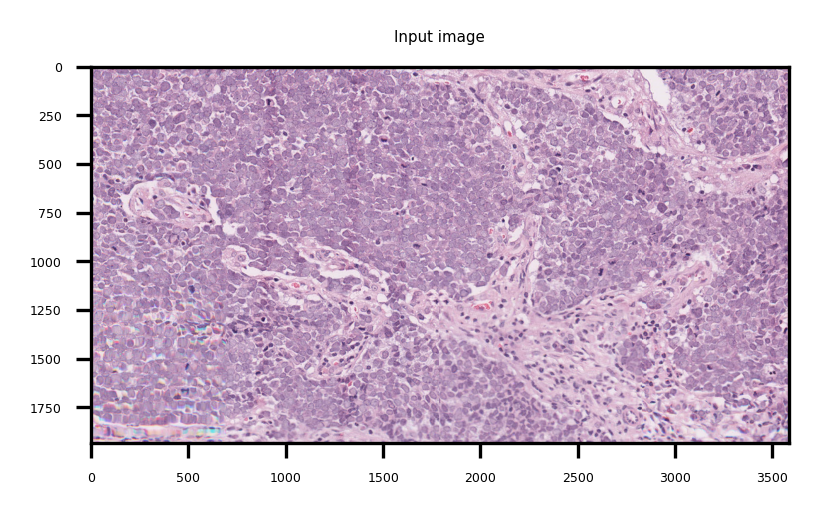

In [33]:
path = "/content/42165.svs screenshot 1651283063811.png"

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print("size = ", np.shape(image))

# Ideal image size 
if np.shape(image) != (1920,2448,3):
    # image = cv2.resize (image, (2448,1920), interpolation = cv2.INTER_AREA)
    print("WARNING: image resized to width/height ratio of 1.25")




matplotlib.rcParams.update({'font.size': 3})
plt.figure(figsize= (3,3))
plt.title("Input image")
plt.imshow(image)
plt.show()

#Automatic brightness and contrast optimization with optional histogram clipping
ideal alpha = 1 and ideal beta = 0

alpha 1.007905138339921
beta 0.0


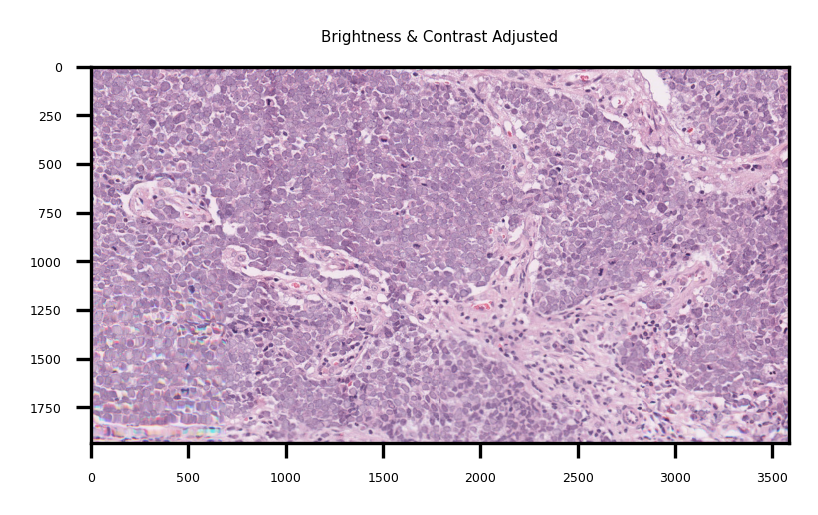

In [34]:
# https://stackoverflow.com/questions/56905592/automatic-contrast-and-brightness-adjustment-of-a-color-photo-of-a-sheet-of-pape/56909036
# Automatic brightness and contrast optimization with optional histogram clipping

def automatic_brightness_and_contrast(image, clip_hist_percent = 0):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)
    
    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))
    
    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0
    
    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1
    
    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1
    
    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha
    

    auto_result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return (auto_result, alpha, beta)


image_auto_corrected, alpha, beta = automatic_brightness_and_contrast(image)
print('alpha', alpha)
print('beta', beta)

matplotlib.rcParams.update({'font.size': 3})
plt.figure(figsize=(3,3))
plt.title("Brightness & Contrast Adjusted")
plt.imshow(image_auto_corrected)
plt.show()


### stain normalization

In [35]:
# def HnE_Normalizer(img):
#     import numpy as np
#     import cv2
#     from matplotlib import pyplot as plt


#     Io = 240 # Transmitted light intensity, Normalizing factor for image intensities
#     alpha = 1  #As recommend in the paper. tolerance for the pseudo-min and pseudo-max (default: 1)
#     beta = 0.15 #As recommended in the paper. OD threshold for transparent pixels (default: 0.15)


#     ######## Step 1: Convert RGB to OD ###################
#     ## reference H&E OD matrix.
#     #Can be updated if you know the best values for your image. 
#     #Otherwise use the following default values. 
#     #Read the above referenced papers on this topic. 
#     HERef = np.array([[0.5626, 0.2159],
#                     [0.7201, 0.8012],
#                     [0.4062, 0.5581]])
#     ### reference maximum stain concentrations for H&E
#     maxCRef = np.array([1.9705, 1.0308])


#     # extract the height, width and num of channels of image
#     h, w, c = img.shape

#     # reshape image to multiple rows and 3 columns.
#     #Num of rows depends on the image size (wxh)
#     img = img.reshape((-1,3))

#     # calculate optical density
#     # OD = −log10(I)  
#     #OD = -np.log10(img+0.004)  #Use this when reading images with skimage
#     #Adding 0.004 just to avoid log of zero. 

#     OD = -np.log10((img.astype(np.float)+1)/Io) #Use this for opencv imread
#     #Add 1 in case any pixels in the image have a value of 0 (log 0 is indeterminate)


#     ############ Step 2: Remove data with OD intensity less than β ############
#     # remove transparent pixels (clear region with no tissue)
#     ODhat = OD[~np.any(OD < beta, axis=1)] #Returns an array where OD values are above beta
#     #Check by printing ODhat.min()

#     ############# Step 3: Calculate SVD on the OD tuples ######################
#     #Estimate covariance matrix of ODhat (transposed)
#     # and then compute eigen values & eigenvectors.
#     eigvals, eigvecs = np.linalg.eigh(np.cov(ODhat.T))


#     ######## Step 4: Create plane from the SVD directions with two largest values ######
#     #project on the plane spanned by the eigenvectors corresponding to the two 
#     # largest eigenvalues    
#     That = ODhat.dot(eigvecs[:,1:3]) #Dot product

#     ############### Step 5: Project data onto the plane, and normalize to unit length ###########
#     ############### Step 6: Calculate angle of each point wrt the first SVD direction ########
#     #find the min and max vectors and project back to OD space
#     phi = np.arctan2(That[:,1],That[:,0])

#     minPhi = np.percentile(phi, alpha)
#     maxPhi = np.percentile(phi, 100-alpha)

#     vMin = eigvecs[:,1:3].dot(np.array([(np.cos(minPhi), np.sin(minPhi))]).T)
#     vMax = eigvecs[:,1:3].dot(np.array([(np.cos(maxPhi), np.sin(maxPhi))]).T)


#     # a heuristic to make the vector corresponding to hematoxylin first and the 
#     # one corresponding to eosin second
#     if vMin[0] > vMax[0]:    
#         HE = np.array((vMin[:,0], vMax[:,0])).T
        
#     else:
#         HE = np.array((vMax[:,0], vMin[:,0])).T


#     # rows correspond to channels (RGB), columns to OD values
#     Y = np.reshape(OD, (-1, 3)).T

#     # determine concentrations of the individual stains
#     C = np.linalg.lstsq(HE,Y, rcond=None)[0]

#     # normalize stain concentrations
#     maxC = np.array([np.percentile(C[0,:], 99), np.percentile(C[1,:],99)])
#     tmp = np.divide(maxC,maxCRef)
#     C2 = np.divide(C,tmp[:, np.newaxis])

#     ###### Step 8: Convert extreme values back to OD space
#     # recreate the normalized image using reference mixing matrix 

#     Inorm = np.multiply(Io, np.exp(-HERef.dot(C2)))
#     Inorm[Inorm>255] = 254
#     Inorm = np.reshape(Inorm.T, (h, w, 3)).astype(np.uint8)  

#     ### Separating H and E components
#     H = np.multiply(Io, np.exp(np.expand_dims(-HERef[:,0], axis=1).dot(np.expand_dims(C2[0,:], axis=0))))
#     H[H>255] = 254
#     H = np.reshape(H.T, (h, w, 3)).astype(np.uint8)

#     E = np.multiply(Io, np.exp(np.expand_dims(-HERef[:,1], axis=1).dot(np.expand_dims(C2[1,:], axis=0))))
#     E[E>255] = 254
#     E = np.reshape(E.T, (h, w, 3)).astype(np.uint8)


#     # plt.figure(figsize= (5,10))
#     # plt.subplot(131) ; plt.imshow(Inorm, cmap = 'gray') ; plt.title('Normalized Ch.')
#     # plt.subplot(132) ; plt.imshow(H) ; plt.title('Hemotoxylin Ch.')
#     # plt.subplot(133) ; plt.imshow(E) ; plt.title('Eosin Ch.')
#     # plt.show()

#     return Inorm

In [36]:
# Inorm = HnE_Normalizer(image_auto_corrected)

# plt.figure(figsize= (4,4))
# plt.imshow(Inorm)
# plt.show()

In [37]:
# Inorm = Inorm.astype(np.uint8)

### turn image into grayscale for segmentation

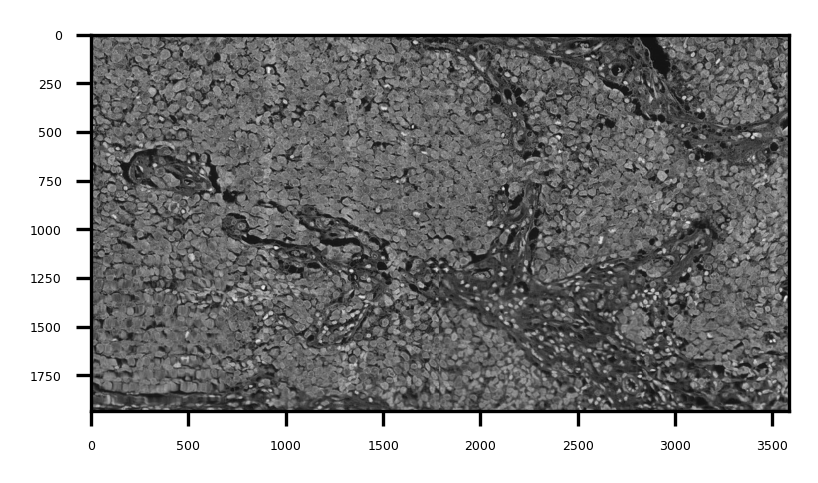

In [38]:
image_auto_corrected_gray = cv2.cvtColor(image_auto_corrected, cv2.COLOR_RGB2GRAY)
image_auto_corrected_neg = 255 - image_auto_corrected_gray

# Inorm_gray = cv2.cvtColor(Inorm, cv2.COLOR_RGB2GRAY)
# Inorm_neg = 255 - Inorm_gray


plt.figure(figsize=(3,3))
plt.imshow(image_auto_corrected_neg, cmap = 'gray')
plt.show()

2022-04-30 01:45:55,588 [INFO] ** TORCH CUDA version installed and working. **
2022-04-30 01:45:55,590 [INFO] >>>> using GPU
2022-04-30 01:45:55,665 [INFO] ~~~ FINDING MASKS ~~~


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:4194: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


2022-04-30 01:46:00,809 [INFO] >>>> TOTAL TIME 5.14 sec
2022-04-30 01:46:00,909 [INFO] ** TORCH CUDA version installed and working. **
2022-04-30 01:46:00,910 [INFO] >>>> using GPU
2022-04-30 01:46:00,986 [INFO] ~~~ FINDING MASKS ~~~
2022-04-30 01:46:06,155 [INFO] >>>> TOTAL TIME 5.17 sec
2022-04-30 01:46:06,275 [INFO] ** TORCH CUDA version installed and working. **
2022-04-30 01:46:06,276 [INFO] >>>> using GPU
2022-04-30 01:46:06,348 [INFO] ~~~ FINDING MASKS ~~~
2022-04-30 01:46:12,050 [INFO] >>>> TOTAL TIME 5.70 sec
2022-04-30 01:46:12,162 [INFO] ** TORCH CUDA version installed and working. **
2022-04-30 01:46:12,163 [INFO] >>>> using GPU
2022-04-30 01:46:12,236 [INFO] ~~~ FINDING MASKS ~~~
2022-04-30 01:46:20,323 [INFO] >>>> TOTAL TIME 8.09 sec
2022-04-30 01:46:20,430 [INFO] ** TORCH CUDA version installed and working. **
2022-04-30 01:46:20,432 [INFO] >>>> using GPU
2022-04-30 01:46:20,504 [INFO] ~~~ FINDING MASKS ~~~
2022-04-30 01:46:31,977 [INFO] >>>> TOTAL TIME 11.47 sec


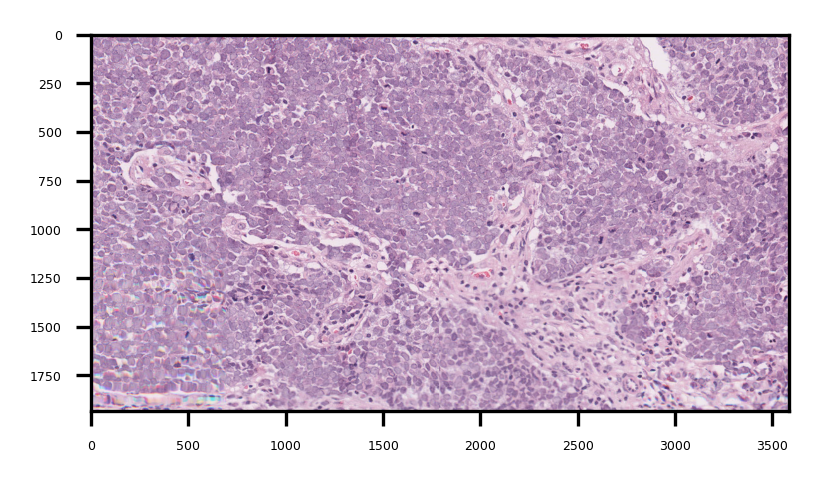

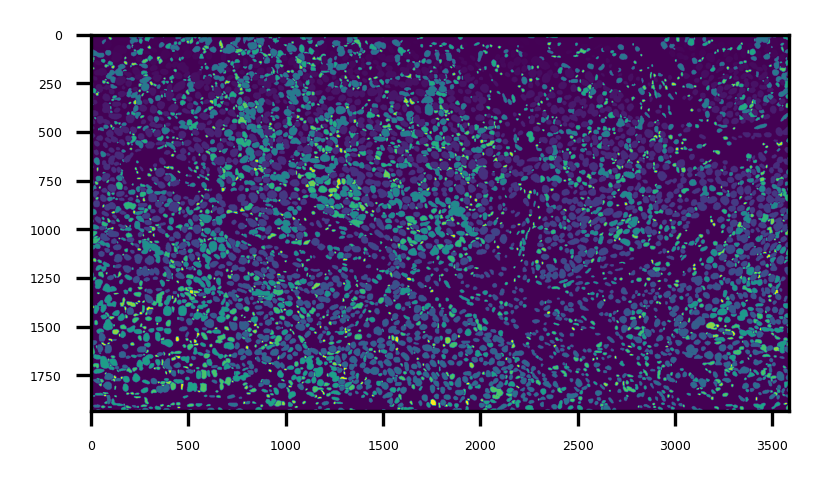

In [39]:
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io
from cellpose import models, io
#!pip install cellpose

last_cell_count = 0
counter = 0


input_image = image_auto_corrected_neg

### 1. Run cellpose segmentation on the original image first ###
for i in range(40, 15, -5):
    # model_type='cyto' or model_type='nuclei'
    model = models.Cellpose(gpu= True, model_type='nuclei')
    channels = [0,0] # IF YOU HAVE GRAYSCALE
    masks, flows, styles, diams = model.eval(input_image, diameter = i, channels = channels)
    
    if i == 40:
        mask_final = masks
    else:
        masks_cell_lable_updated = np.where(masks > 0, masks + last_cell_count, 0)
        mask_final = np.where(mask_final==0, masks_cell_lable_updated, mask_final) 
        

    mask_temp = np.where(masks > 0, 1, 0)
    kernel = np.ones((5,5),np.uint8)
    mask_temp_dilated = cv2.dilate(mask_temp.astype(np.uint8), kernel, iterations = 1)


    mask_temp_dilated_flipped = np.where(mask_temp_dilated == 1, 0, -1) 
    mask_temp_dilated_flipped = np.where(mask_temp_dilated_flipped == -1, 1, mask_temp_dilated_flipped) 

    input_image = np.multiply(mask_temp_dilated_flipped, input_image)
    input_image = np.where(input_image < 50, 0, input_image)
    last_cell_count = np.max(mask_final)
    



# Visualizing the results
matplotlib.rcParams.update({'font.size': 3})
plt.figure(figsize= (3,3))
plt.imshow(image)
plt.show()

matplotlib.rcParams.update({'font.size': 3})
plt.figure(figsize= (3,3))
plt.imshow(mask_final)
plt.show()


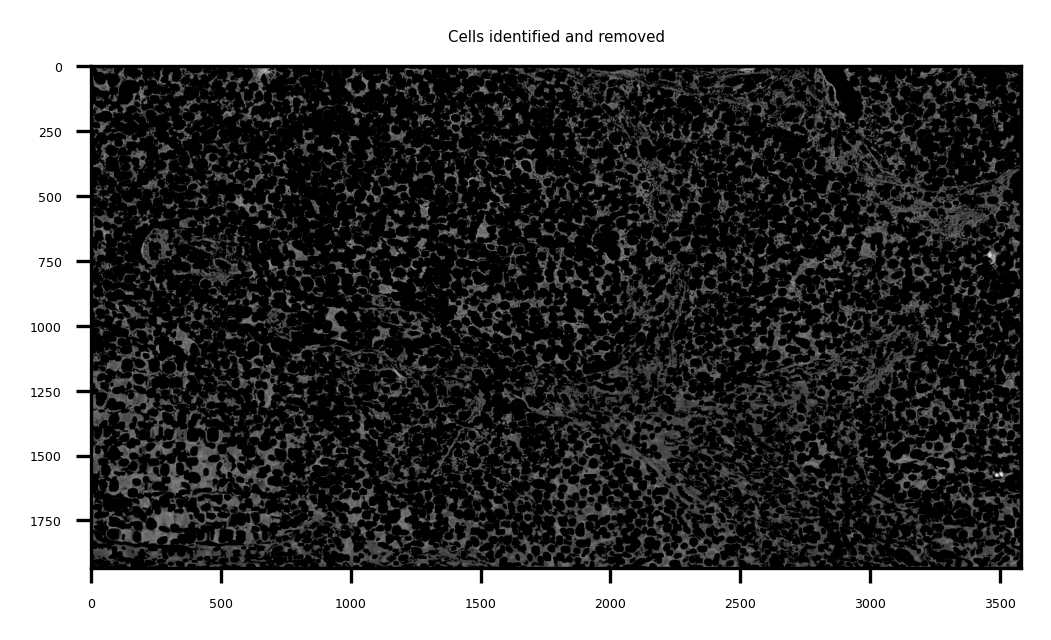

In [40]:
matplotlib.rcParams.update({'font.size': 3})
plt.figure(figsize=(4,4))
plt.title("Cells identified and removed")
plt.imshow(input_image, cmap = 'gray')
plt.show()

In [41]:
print("Number of total candidate cells identified: ", np.max(mask_final))

Number of total candidate cells identified:  5545


In [42]:
values, counts = np.unique(mask_final, return_counts=True)
len(values)

5546

In [43]:
uneroded_original_mask = np.copy(mask_final)

In [44]:
mask_final_cleared = clear_border(mask_final)

mask_final_cleared = np.where(mask_final_cleared > 0, 1, 0)
kernel = np.ones((5,5),np.uint8)
mask_final_cleared_eroded = cv2.erode(mask_final_cleared.astype(np.uint8), kernel, iterations = 0)

mask_final = mask_final * mask_final_cleared_eroded

In [45]:
values, counts = np.unique(mask_final, return_counts=True)
len(values)

5368

# Using Scikit image Region Props to extrach morphological features of objects identified

In [46]:
# A function/method that will create some morphological measurements on the mask generated by cellpose

def predict_generate_cell_properties(input_cell_mask, input_image):    
    # Label each region/cell 
    masks = skimage.measure.label(input_cell_mask, background= 0, return_num= False, connectivity = 2)

    # Get properties of each region/cell
    cell_props = regionprops_table((masks), input_image, properties= ['label','area','bbox', 'centroid', 'minor_axis_length', 'major_axis_length', 'mean_intensity'])
    df = pd.DataFrame(cell_props)
    df.tail()

    return df


# Creating a nucleus datafram for visualization of nuclear segmentation results

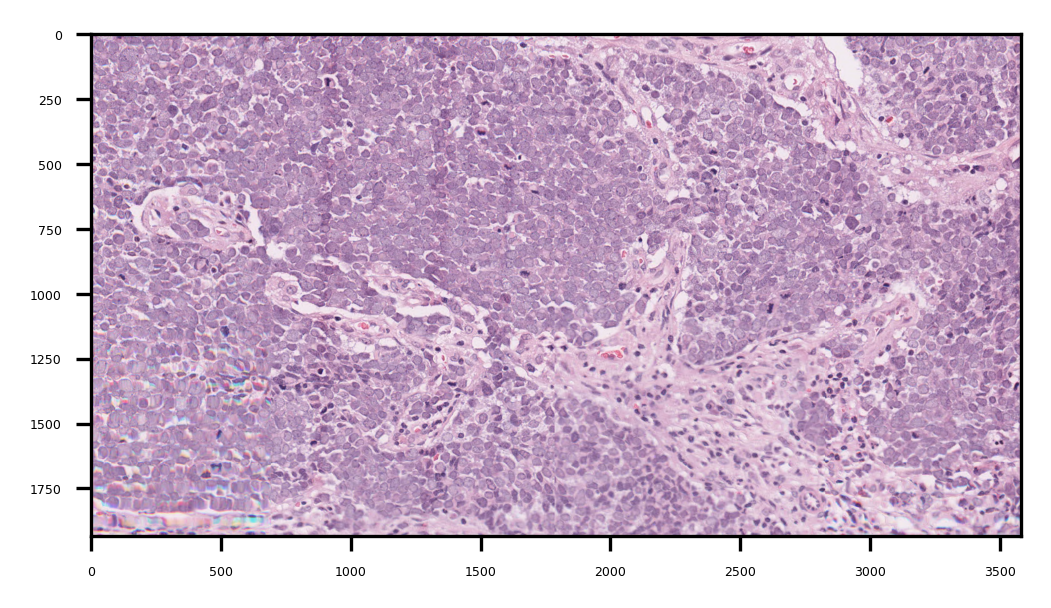

In [47]:
df_nuclei = predict_generate_cell_properties(mask_final, image_auto_corrected)
original_image_copy_total_cells = np.copy(image_auto_corrected)


matplotlib.rcParams.update({'font.size': 3})
plt.figure(figsize= (4,4))
plt.imshow(original_image_copy_total_cells)
plt.show()


In [48]:
df_nuclei

label  area  bbox-0  bbox-1  bbox-2  bbox-3   centroid-0   centroid-1  \
0         1   219       3     102      19     123     9.981735   111.744292   
1         2   366       3    1020      24    1043    12.005464  1031.092896   
2         3    69       3    1866      15    1874     8.652174  1869.260870   
3         4   387       3    3355      29    3376    15.860465  3364.576227   
4         5   871       5    1152      33    1196    18.272101  1172.362801   
...     ...   ...     ...     ...     ...     ...          ...          ...   
5366   5367   158    1911    1591    1930    1605  1920.379747  1597.094937   
5367   5368   272    1911    2910    1929    2935  1919.485294  2922.036765   
5368   5369   218    1911    2976    1925    2997  1917.848624  2985.229358   
5369   5370   280    1913    1627    1925    1656  1918.228571  1641.035714   
5370   5371   166    1914    1573    1926    1589  1919.578313  1580.120482   

      minor_axis_length  major_axis_length  mean_intensity-0  \
0             13.250371          21.755740        113.835616   
1             19.145260          24.873192        178.185792   
2              7.622292          11.974883        202.681159   
3             17.118610          29.161510        151.178295   
4             26.083196          43.126116        167.707233   
...                 ...                ...               ...   
5366          11.278972          20.619619        163.601266   
5367          12.988236          28.018660        175.459559   
5368          13.930415          20.458088        167.550459   
5369          12.377961          29.453858        146.378571   
5370          12.613077          16.900892        182.807229   

      mean_intensity-1  mean_intensity-2  
0            81.278539        133.812785  
1           139.945355        177.554645  
2           130.028986        165.579710  
3           117.906977        162.808786  
4           127.432836        170.960964  
...                ...               ...  
5366        136.708861        174.379747  
5367        140.602941        183.158088  
5368        151.293578        191.577982  
5369        116.550000        161.082143  
5370        152.234940        186.036145  

[5371 rows x 13 columns]

In [49]:
np.mean(df_nuclei['minor_axis_length'])

19.81725075009094

In [50]:
from keras.models import load_model

model_Mitoses_counter = load_model("/content/Mitoses_Binary_classification_40x40_April_29th (5).h5", compile = False)

In [55]:
# Estimating mean cytoplasmic thickness using cell radius
cytoplasm_thickness = 5

In [56]:
from skimage import data
from skimage.color import rgb2hed, hed2rgb

def HnE_Hematoxylin(image):
    # Separate the stains from the IHC image
    ihc_hed = rgb2hed(image)

    # Create an RGB image for each of the stains
    null = np.zeros_like(ihc_hed[:, :, 0])
    ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
    ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
    ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

    return (ihc_h * 255).astype(np.uint8)

100%|██████████| 5371/5371 [03:31<00:00, 25.37it/s]


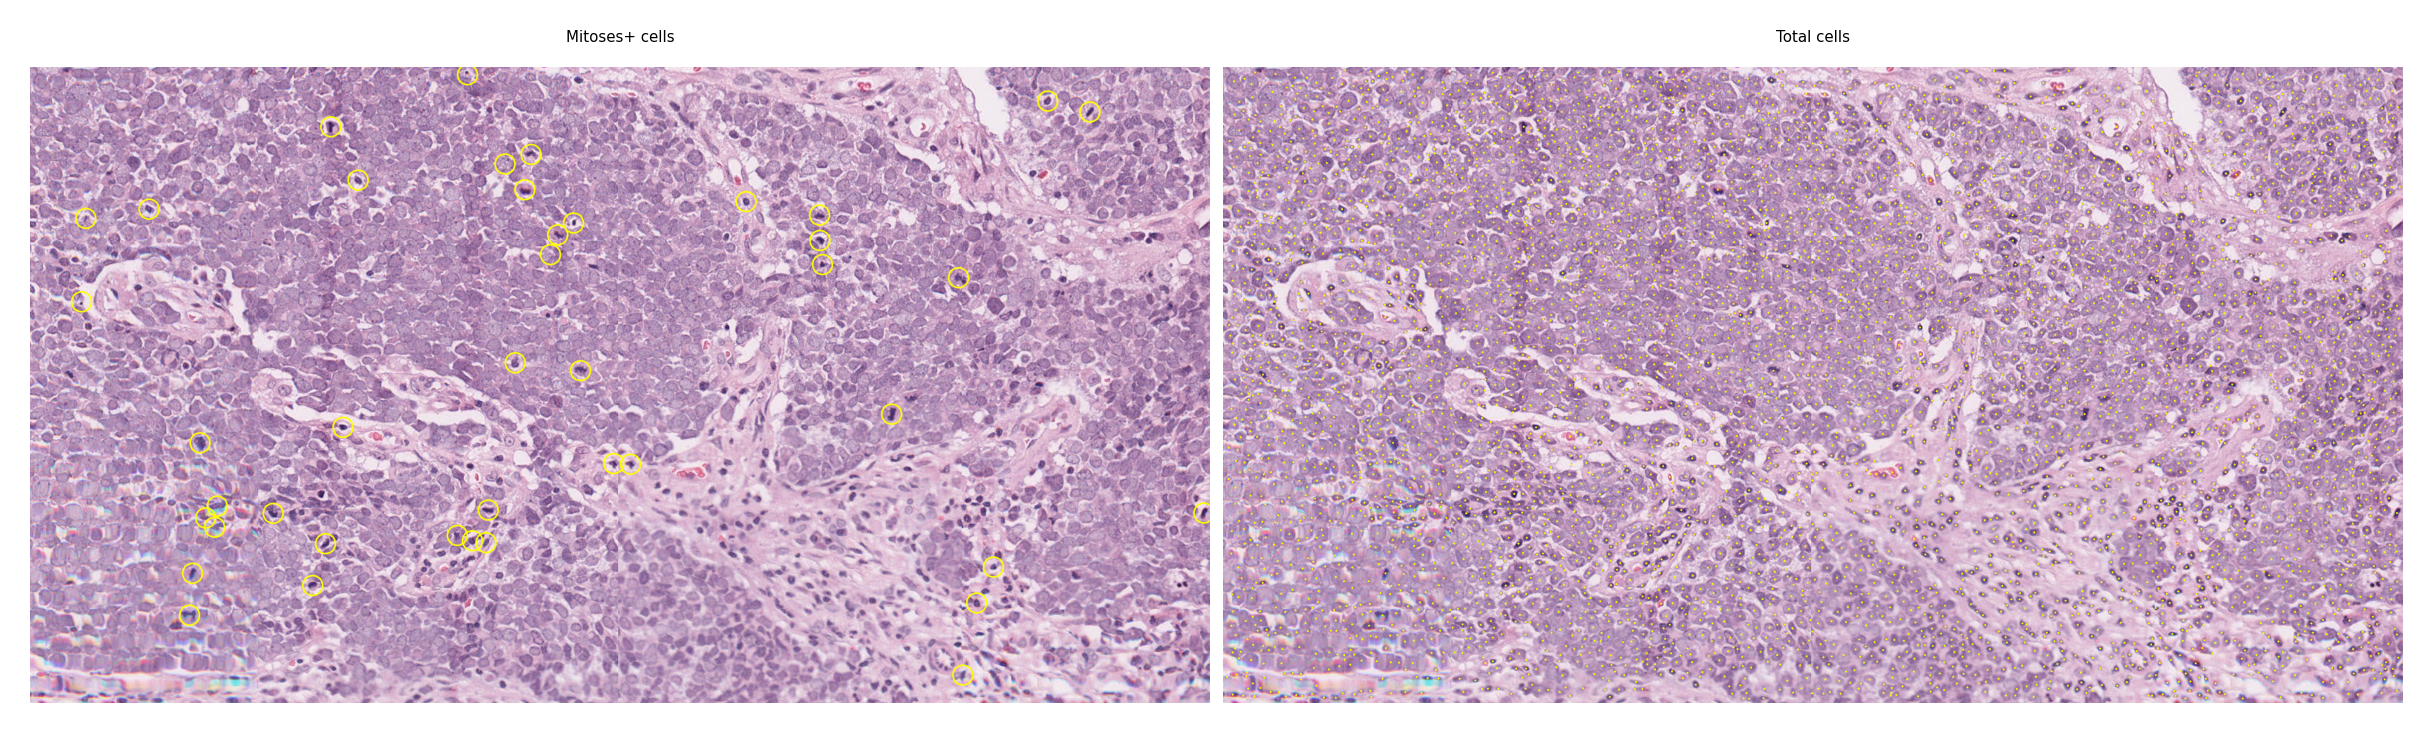

In [57]:
Mitoses_counter = 0
Tota_cell_counter = 0
mythreshold = 0.005


original_image_copy_Mitoses_ver2 = np.copy(image_auto_corrected)
original_image_copy_Total_Cells_ver2 = np.copy(image_auto_corrected)


c = 0
for i in tqdm(range(len(df_nuclei))):
    if df_nuclei['area'][i] > 25:   # Exclude cells smaller than ~10 pixel in diameter

        # Image crop
        image_crop_ = image_auto_corrected [df_nuclei['bbox-0'][i] - cytoplasm_thickness : df_nuclei['bbox-2'][i] + cytoplasm_thickness, df_nuclei['bbox-1'][i] - cytoplasm_thickness : df_nuclei['bbox-3'][i] + cytoplasm_thickness]
        h, w, d = np.shape(image_crop_)

        if h > 5 and w > 5:
            c+=1
            # model expect 40x40 RGB (specifically, DAB channel only)
            image_crop_H = HnE_Hematoxylin(image_crop_)
            ihc_d_crop_40x40 = cv2.resize(image_crop_H, (40,40),interpolation=cv2.INTER_AREA)
            ihc_d_crop_40x40_ = np.expand_dims(ihc_d_crop_40x40, axis = 0)

            if model_Mitoses_counter.predict(ihc_d_crop_40x40_) > mythreshold:

                Mitoses_counter += 1   
                cv2.circle(original_image_copy_Mitoses_ver2,(df_nuclei.loc[i, ['centroid-1']], df_nuclei.loc[i, ['centroid-0']]), 30, (255,255,0), 3)

            # Total cell image
            Tota_cell_counter += 1
            cv2.circle(original_image_copy_Total_Cells_ver2,(df_nuclei.loc[i, ['centroid-1']], df_nuclei.loc[i, ['centroid-0']]), 3, (255,255,0), -1)




# Display
fig, axes = plt.subplots(1,2, figsize=(8,8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(original_image_copy_Mitoses_ver2)
ax[0].set_title("Mitoses+ cells")

ax[1].imshow(original_image_copy_Total_Cells_ver2)
ax[1].set_title("Total cells")


for a in ax.ravel():
    a.axis('off')

fig.tight_layout()
